# Heart Attack Prediction 

# Importing Libraries

In [5]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn. model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import warnings
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.pipeline import make_pipeline 
from kneed import KneeLocator

## Load Dataset

In [6]:
# load dataset

df = pd.read_csv('heart.csv')

#### we loaded the heart dataset into a Pandas data frame using the read csv function.

# Classification

### In this step, we use the Decision Tree to predict the heart attack in the pateints in the dataset. We use the discritized target variable which has two values small and large. So this is a binary classification problem. We will evaluate the performance of the decision tree using different sizes for the training and test data and for two different criteria for attribute selection: gini and entropy. We will use the classification accuracy and confusion matrix to evaluate the performance and prediction power of the decision tree.

In [31]:
# split the dataset into features and target variable

# features
X = df.drop(['target','target_discrete','target_discrete_binary'], axis = 1)

# target variable
y = df['target_discrete_binary']


## Three Different test size on Gini

Using test_size = 0.3

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [33]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 0.98


### The results show that the decision tree successfully classified 98% of the patients in the dataset.

# Confusion Matrix:

In [35]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[157   6]
 [  0 128]]


### The confusion matrix show that the decision tree successfully classified 157 of the patients as small heart attack and 128 patients as large hear attack. But, the decision tree incorrectly classified 6 patients as suffering from a large heart attack.

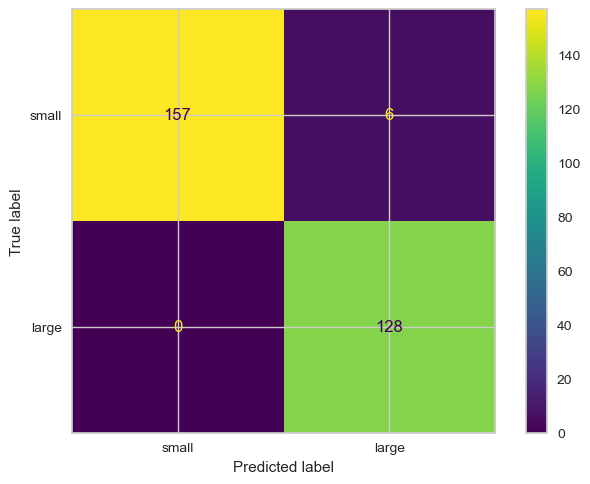

In [36]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


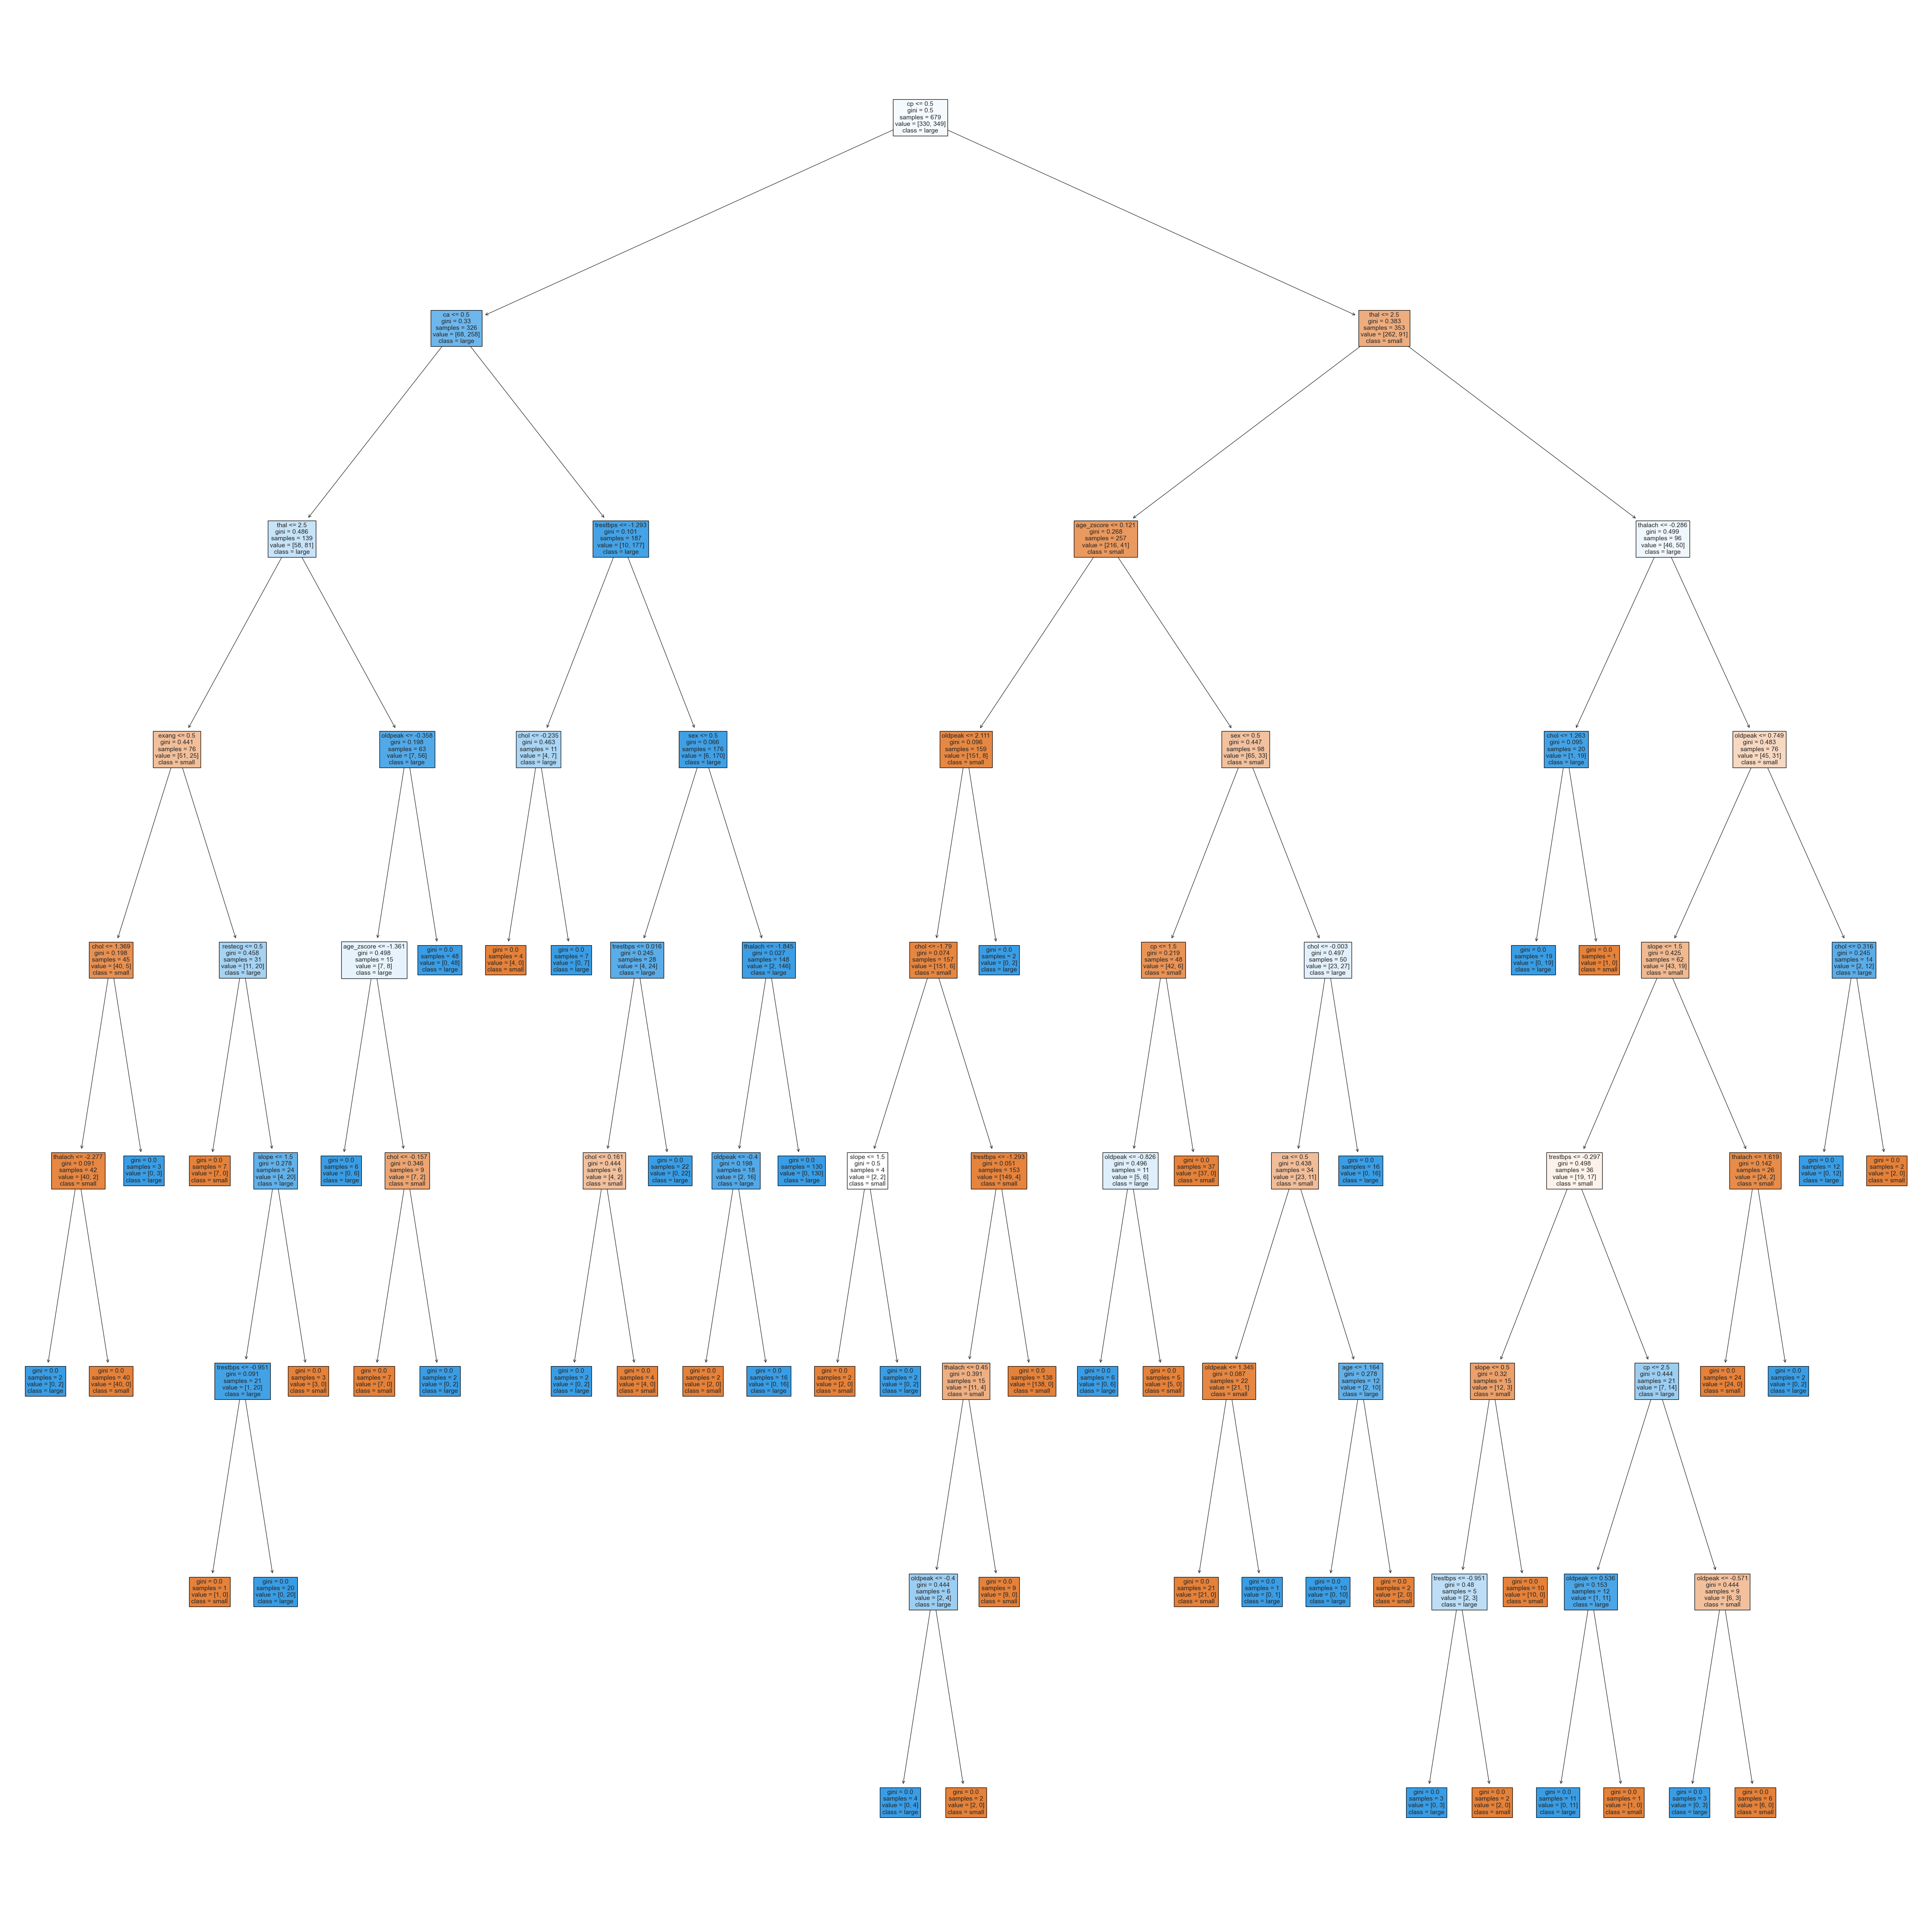

In [37]:
# plot the decision tree
fn = X.keys().tolist()
cn = df['target_discrete_binary'].unique()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

## using test_size = 0.2

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [39]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [40]:
# Model Accuracy
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 0.98


### The results show that the decision tree successfully classified 98% of the patients in the dataset.

# Confusion Matrix:

In [41]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[106   3]
 [  0  85]]


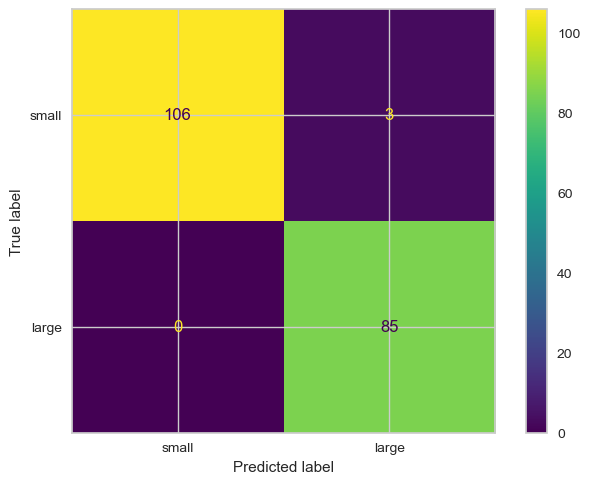

In [42]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### The confusion matrix show that the decision tree successfully classified 106 of the patients as small heart attack and 85 patients as large hear attack. But, the decision tree incorrectly classified 3 patients as suffering from a large heart attack.

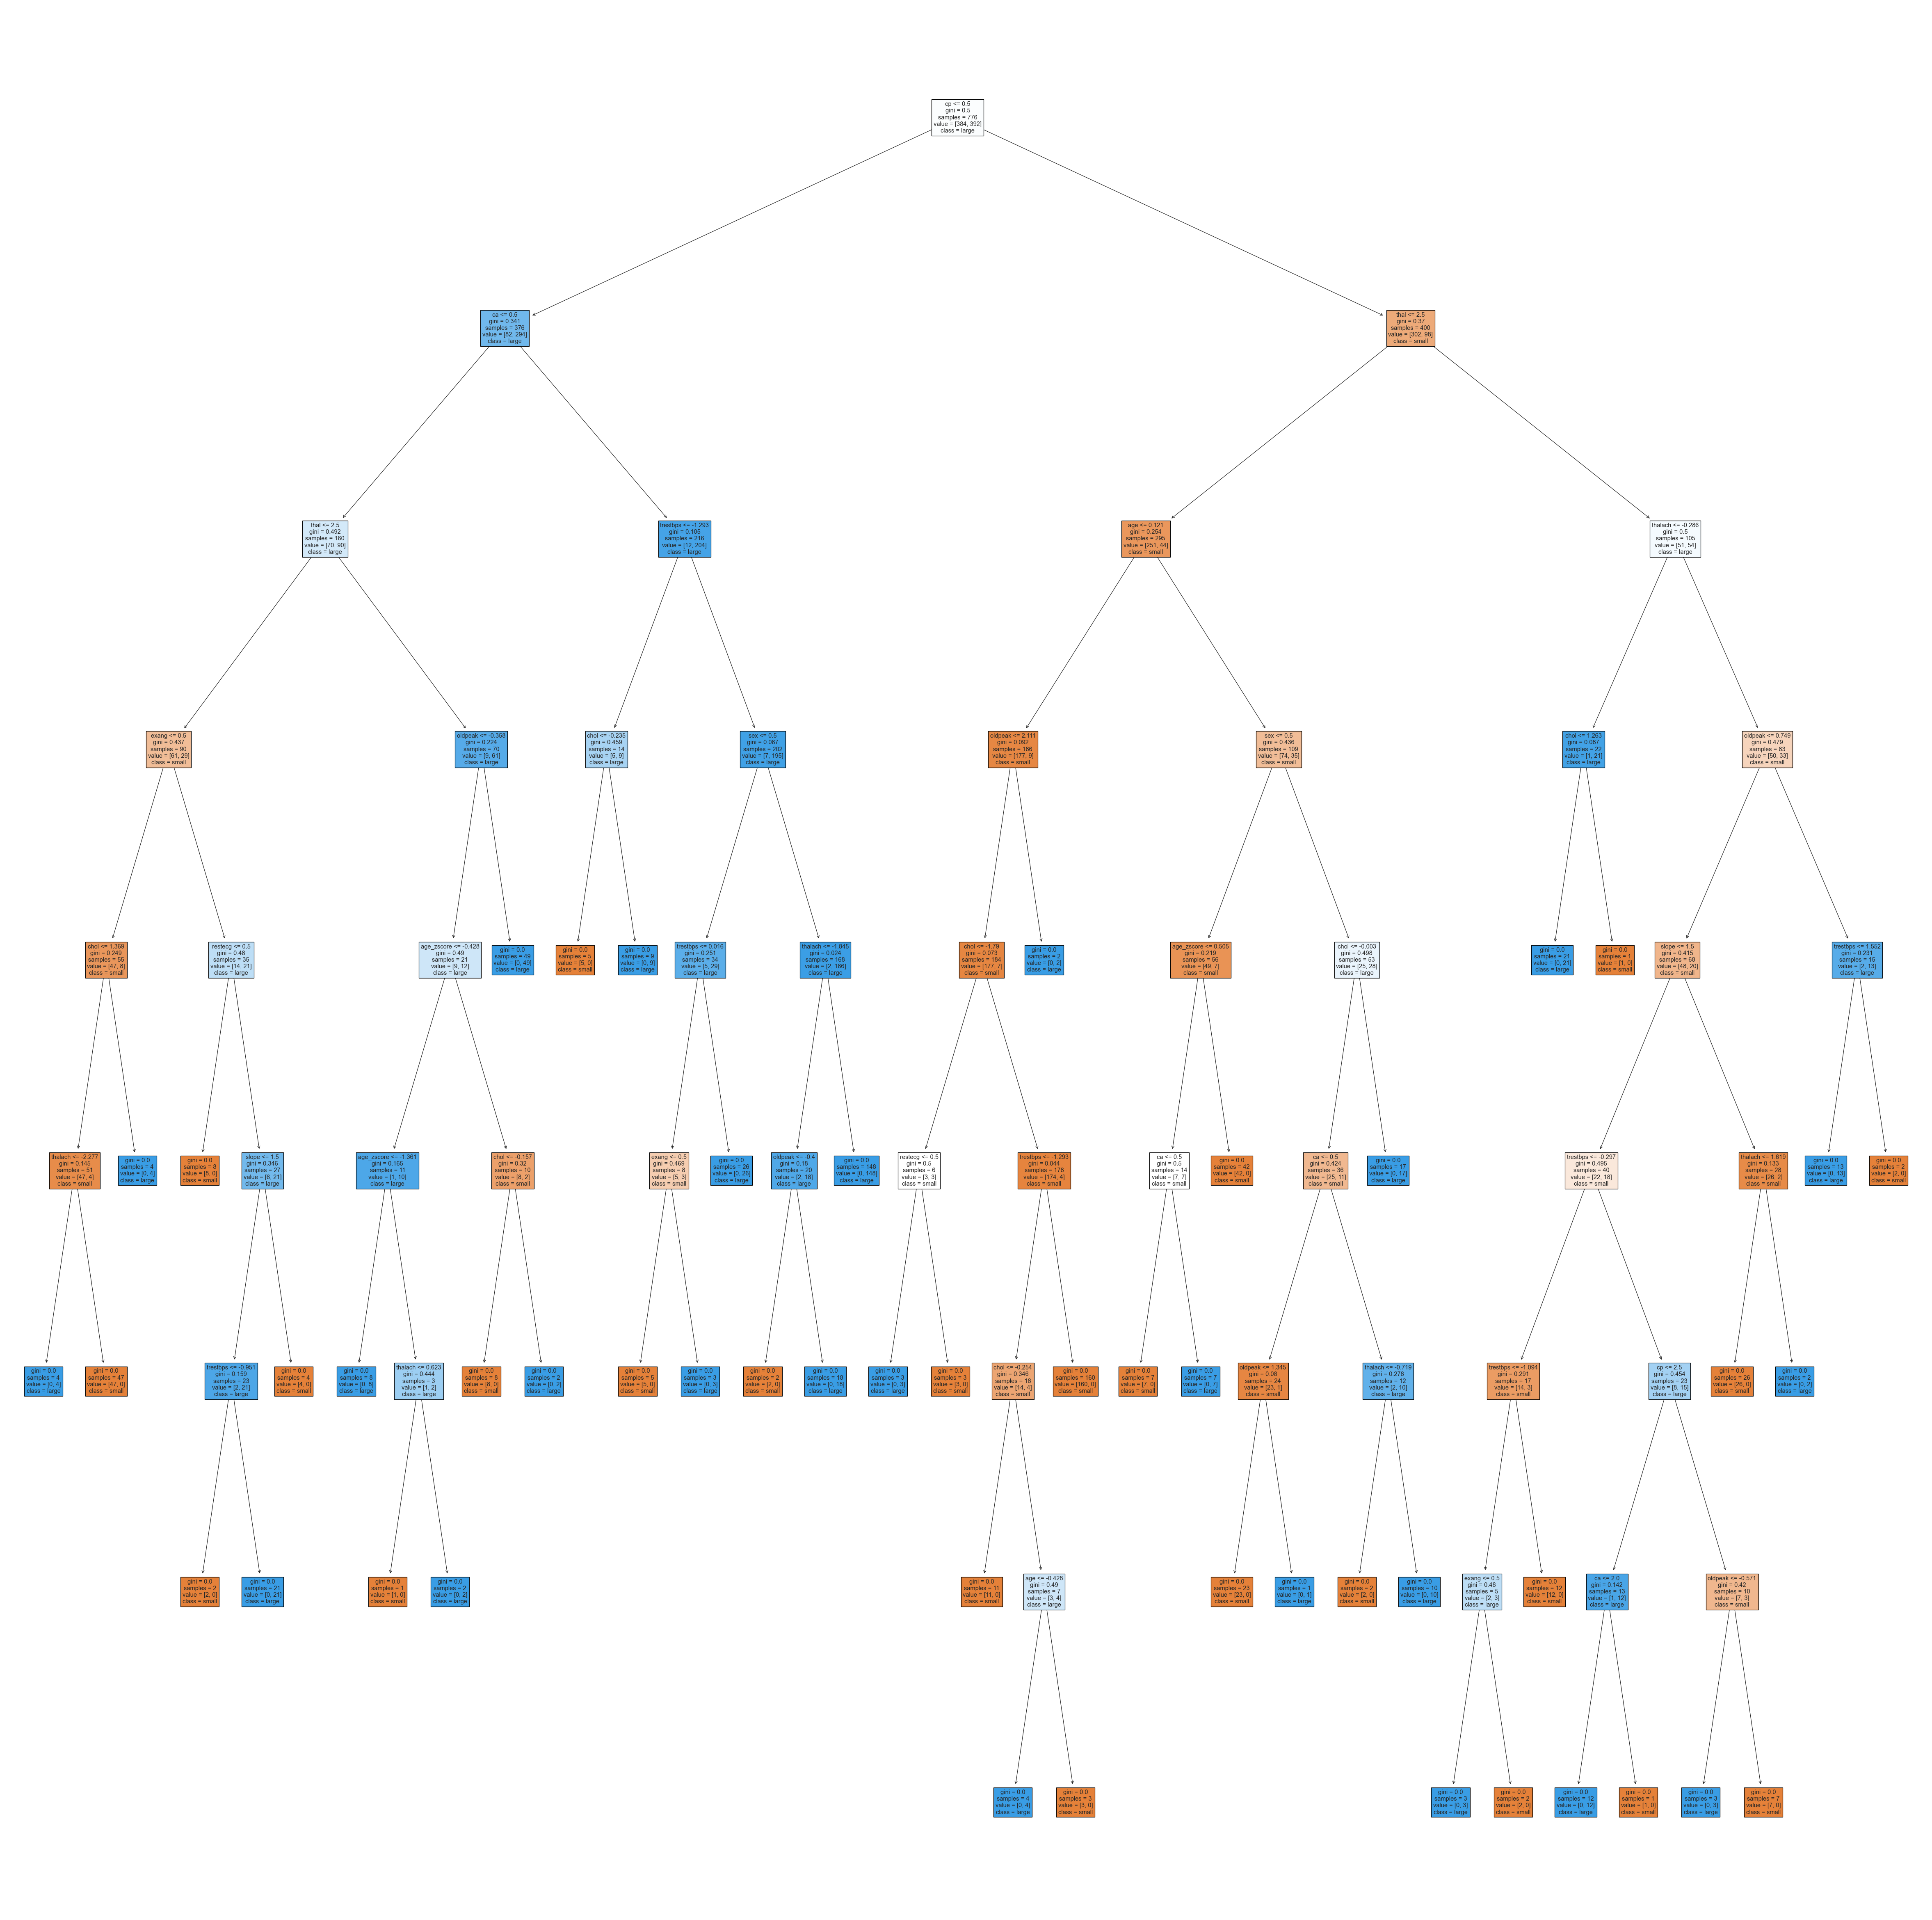

In [43]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

## using test_size = 0.1

In [44]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [45]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 1.0


### The results show that the decision tree successfully classified 100% of the patients in the dataset.

# Confusion Matrix:

In [47]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[52  0]
 [ 0 45]]


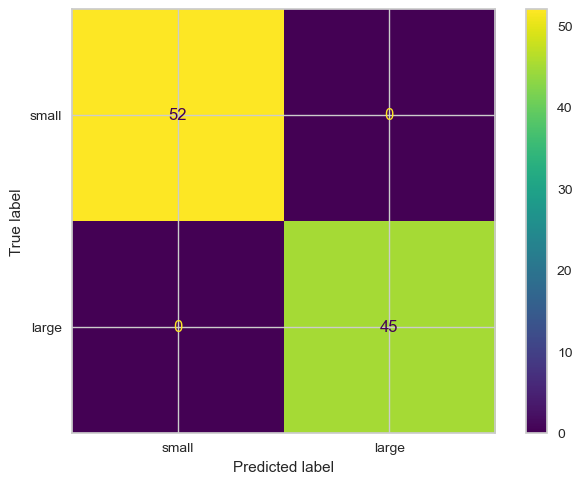

In [48]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### The confusion matrix show that the decision tree successfully classified the patients in the dataset.

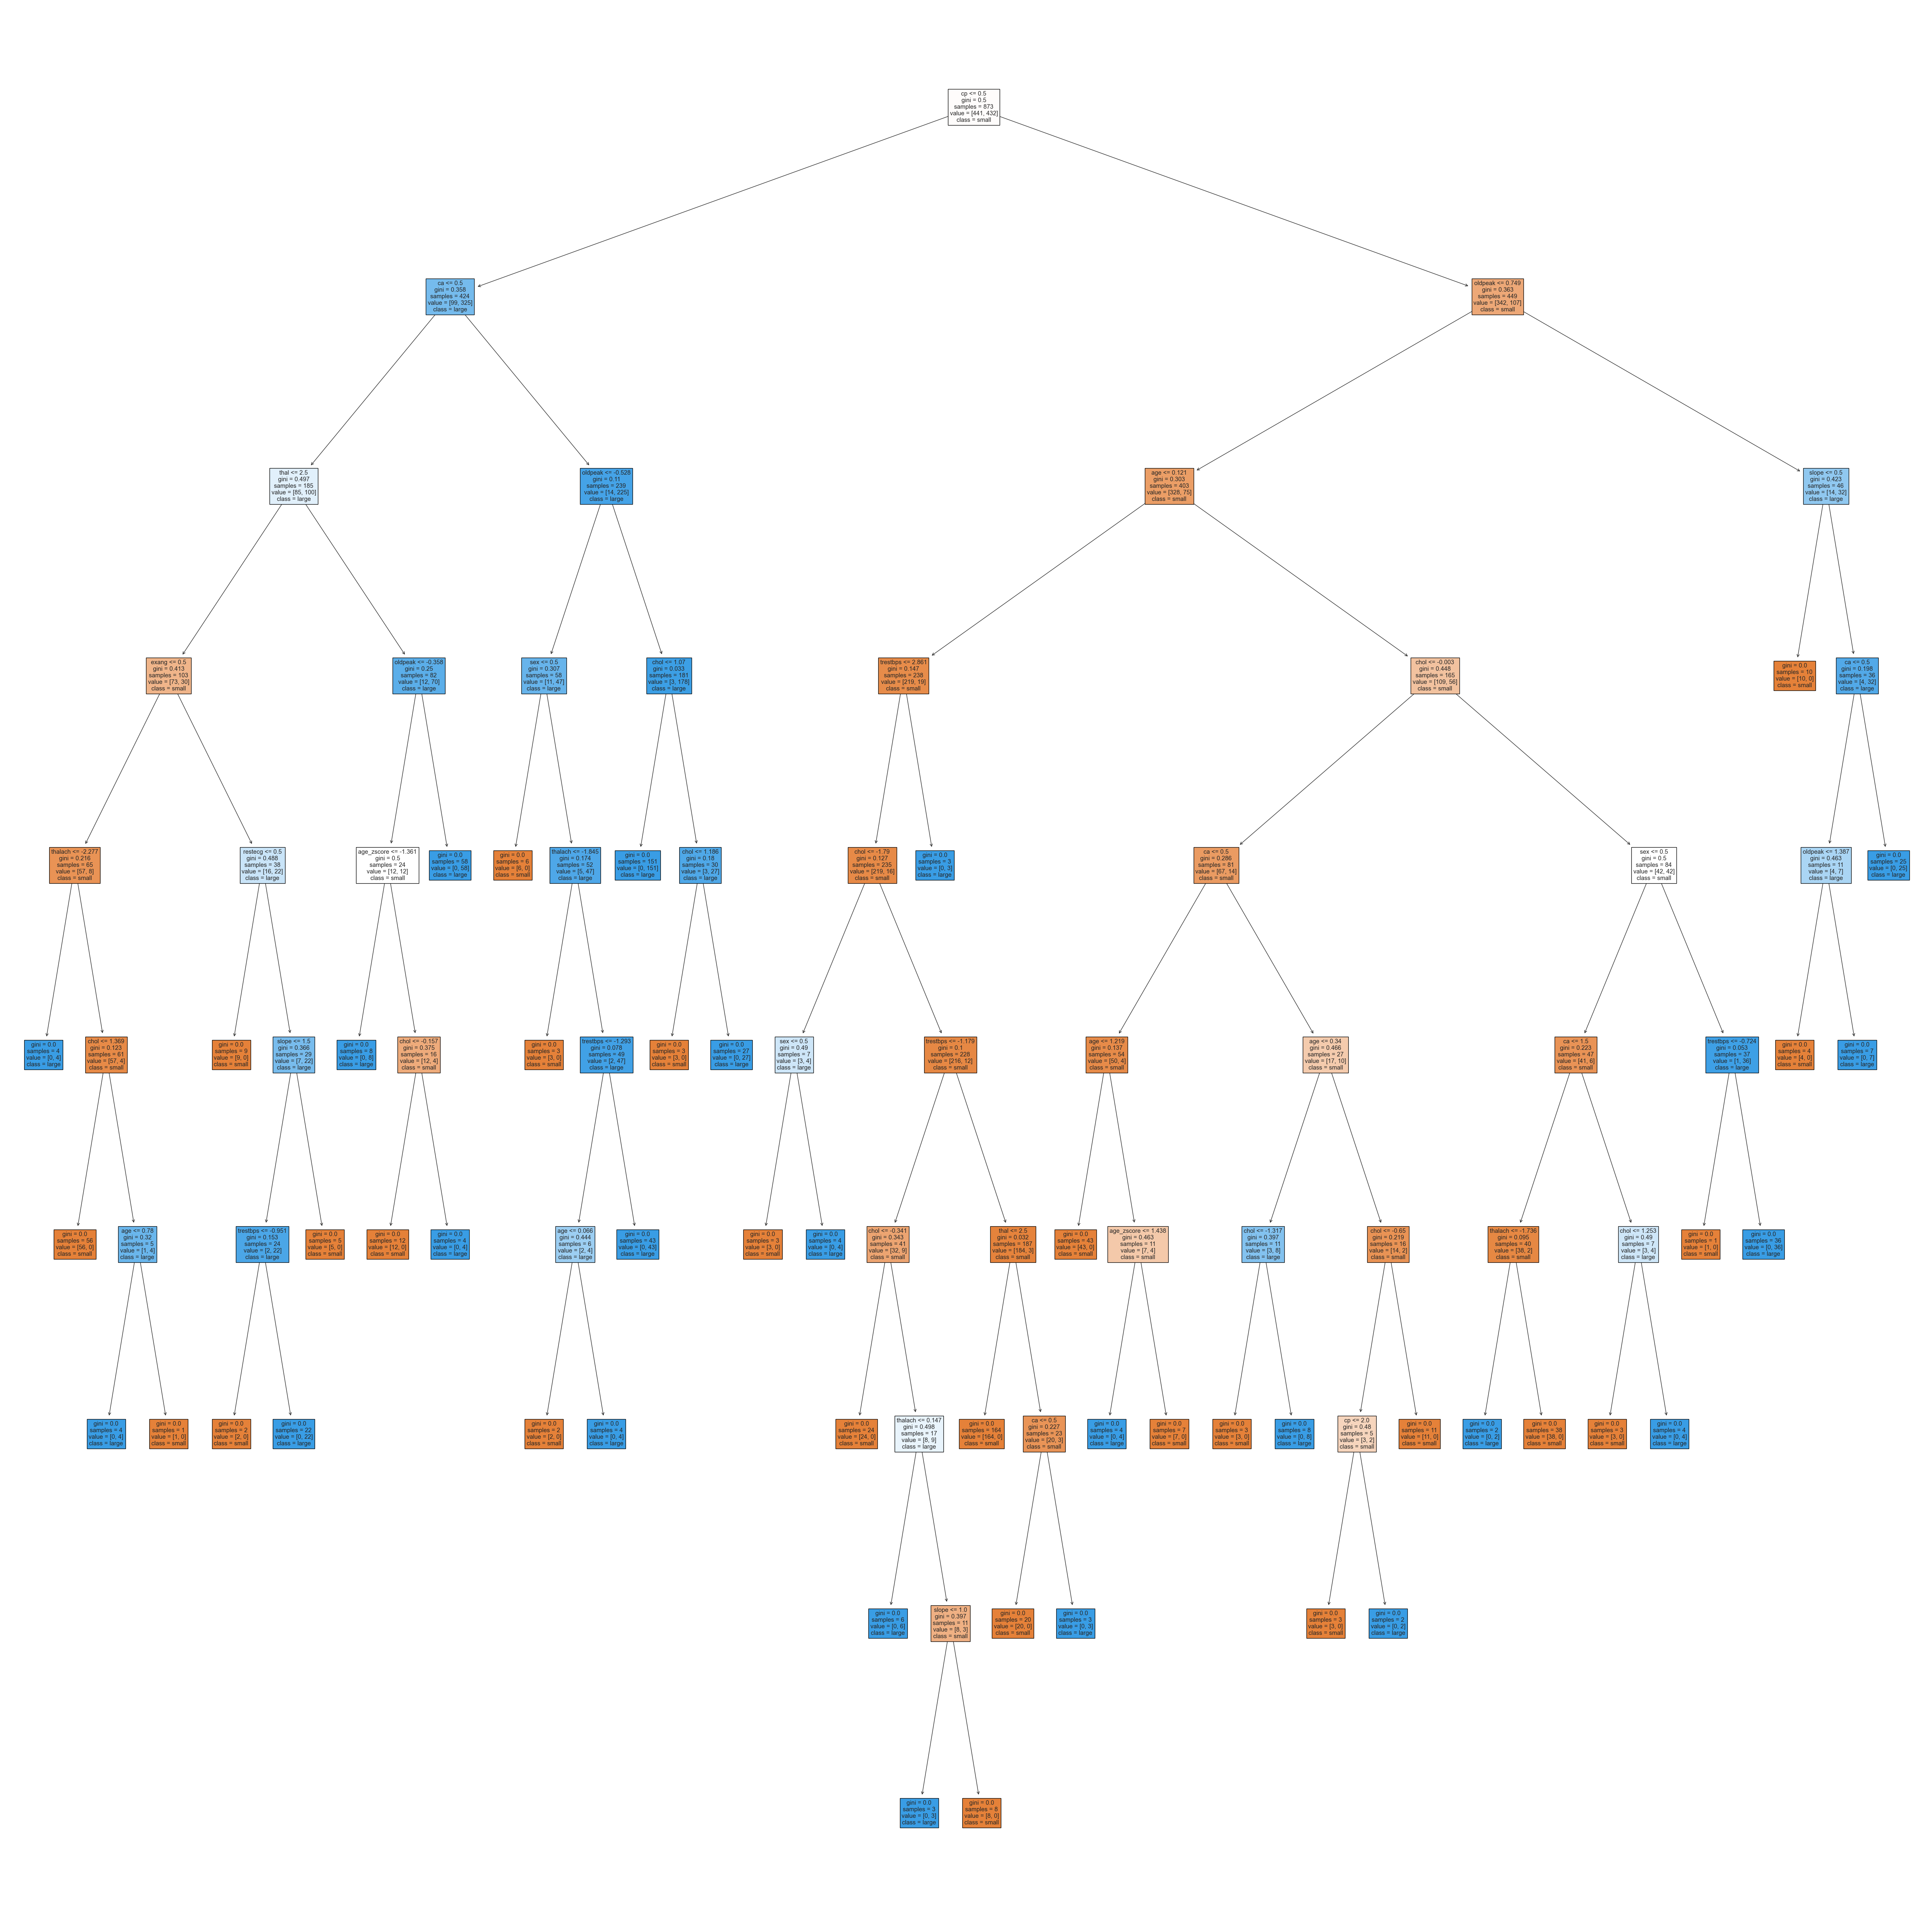

In [49]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

# Three Different size on information Entropy 

## using test_size = 0.3

In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [51]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion="entropy")

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [52]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 0.98


### The results show that the decision tree successfully classified 98% of the patients in the dataset.

# Confusion Matrix:

In [53]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[157   6]
 [  0 128]]


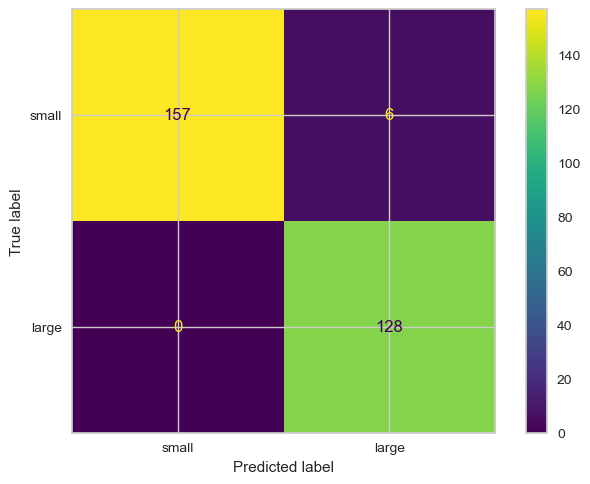

In [54]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### The confusion matrix show that the decision tree successfully classified 157 of the patients as small heart attack and 128 patients as large hear attack. But, the decision tree incorrectly classified 6 patients as suffering from a large heart attack.

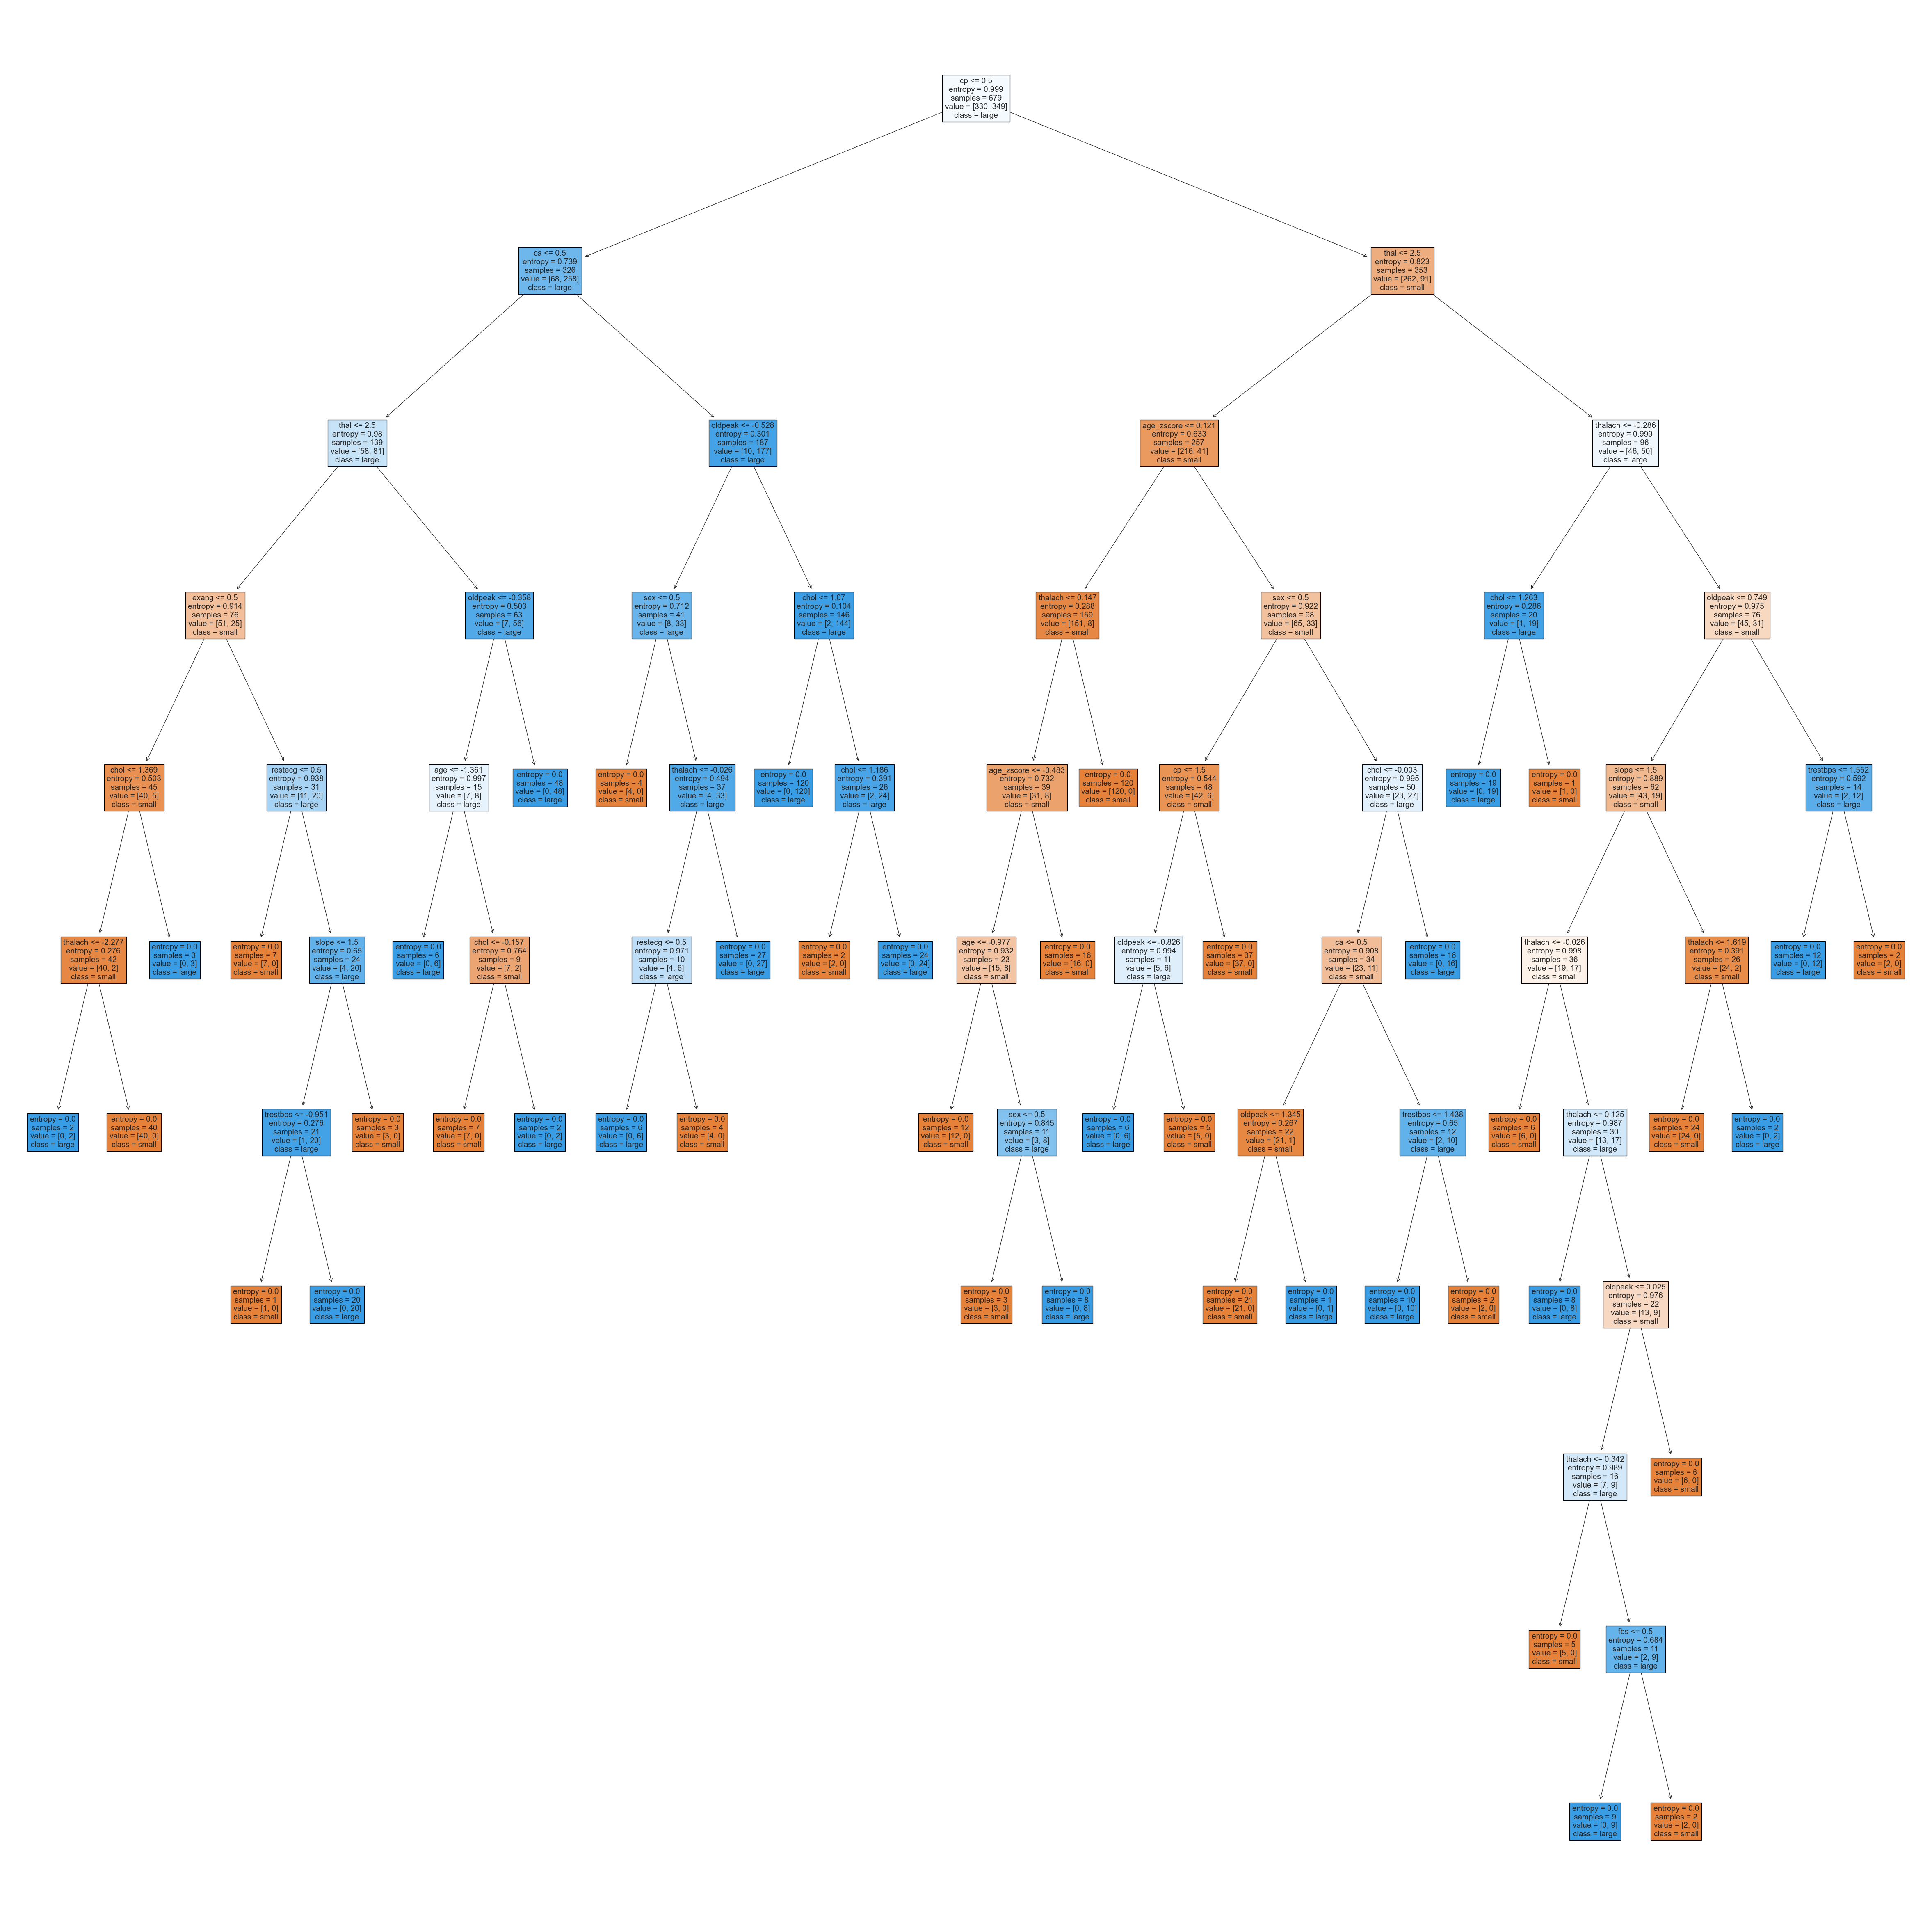

In [55]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

## Using test_size = 0.2

In [56]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)


In [57]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion="entropy")

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [58]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 1.0


### The results show that the decision tree successfully classified 100% of the patients in the dataset.

# Confusion Matrix:

In [59]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[109   0]
 [  0  85]]


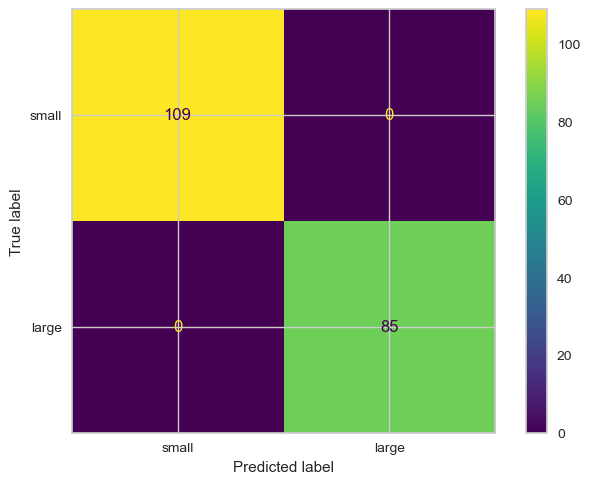

In [60]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### The confusion matrix show that the decision tree successfully classified the patients in the dataset.

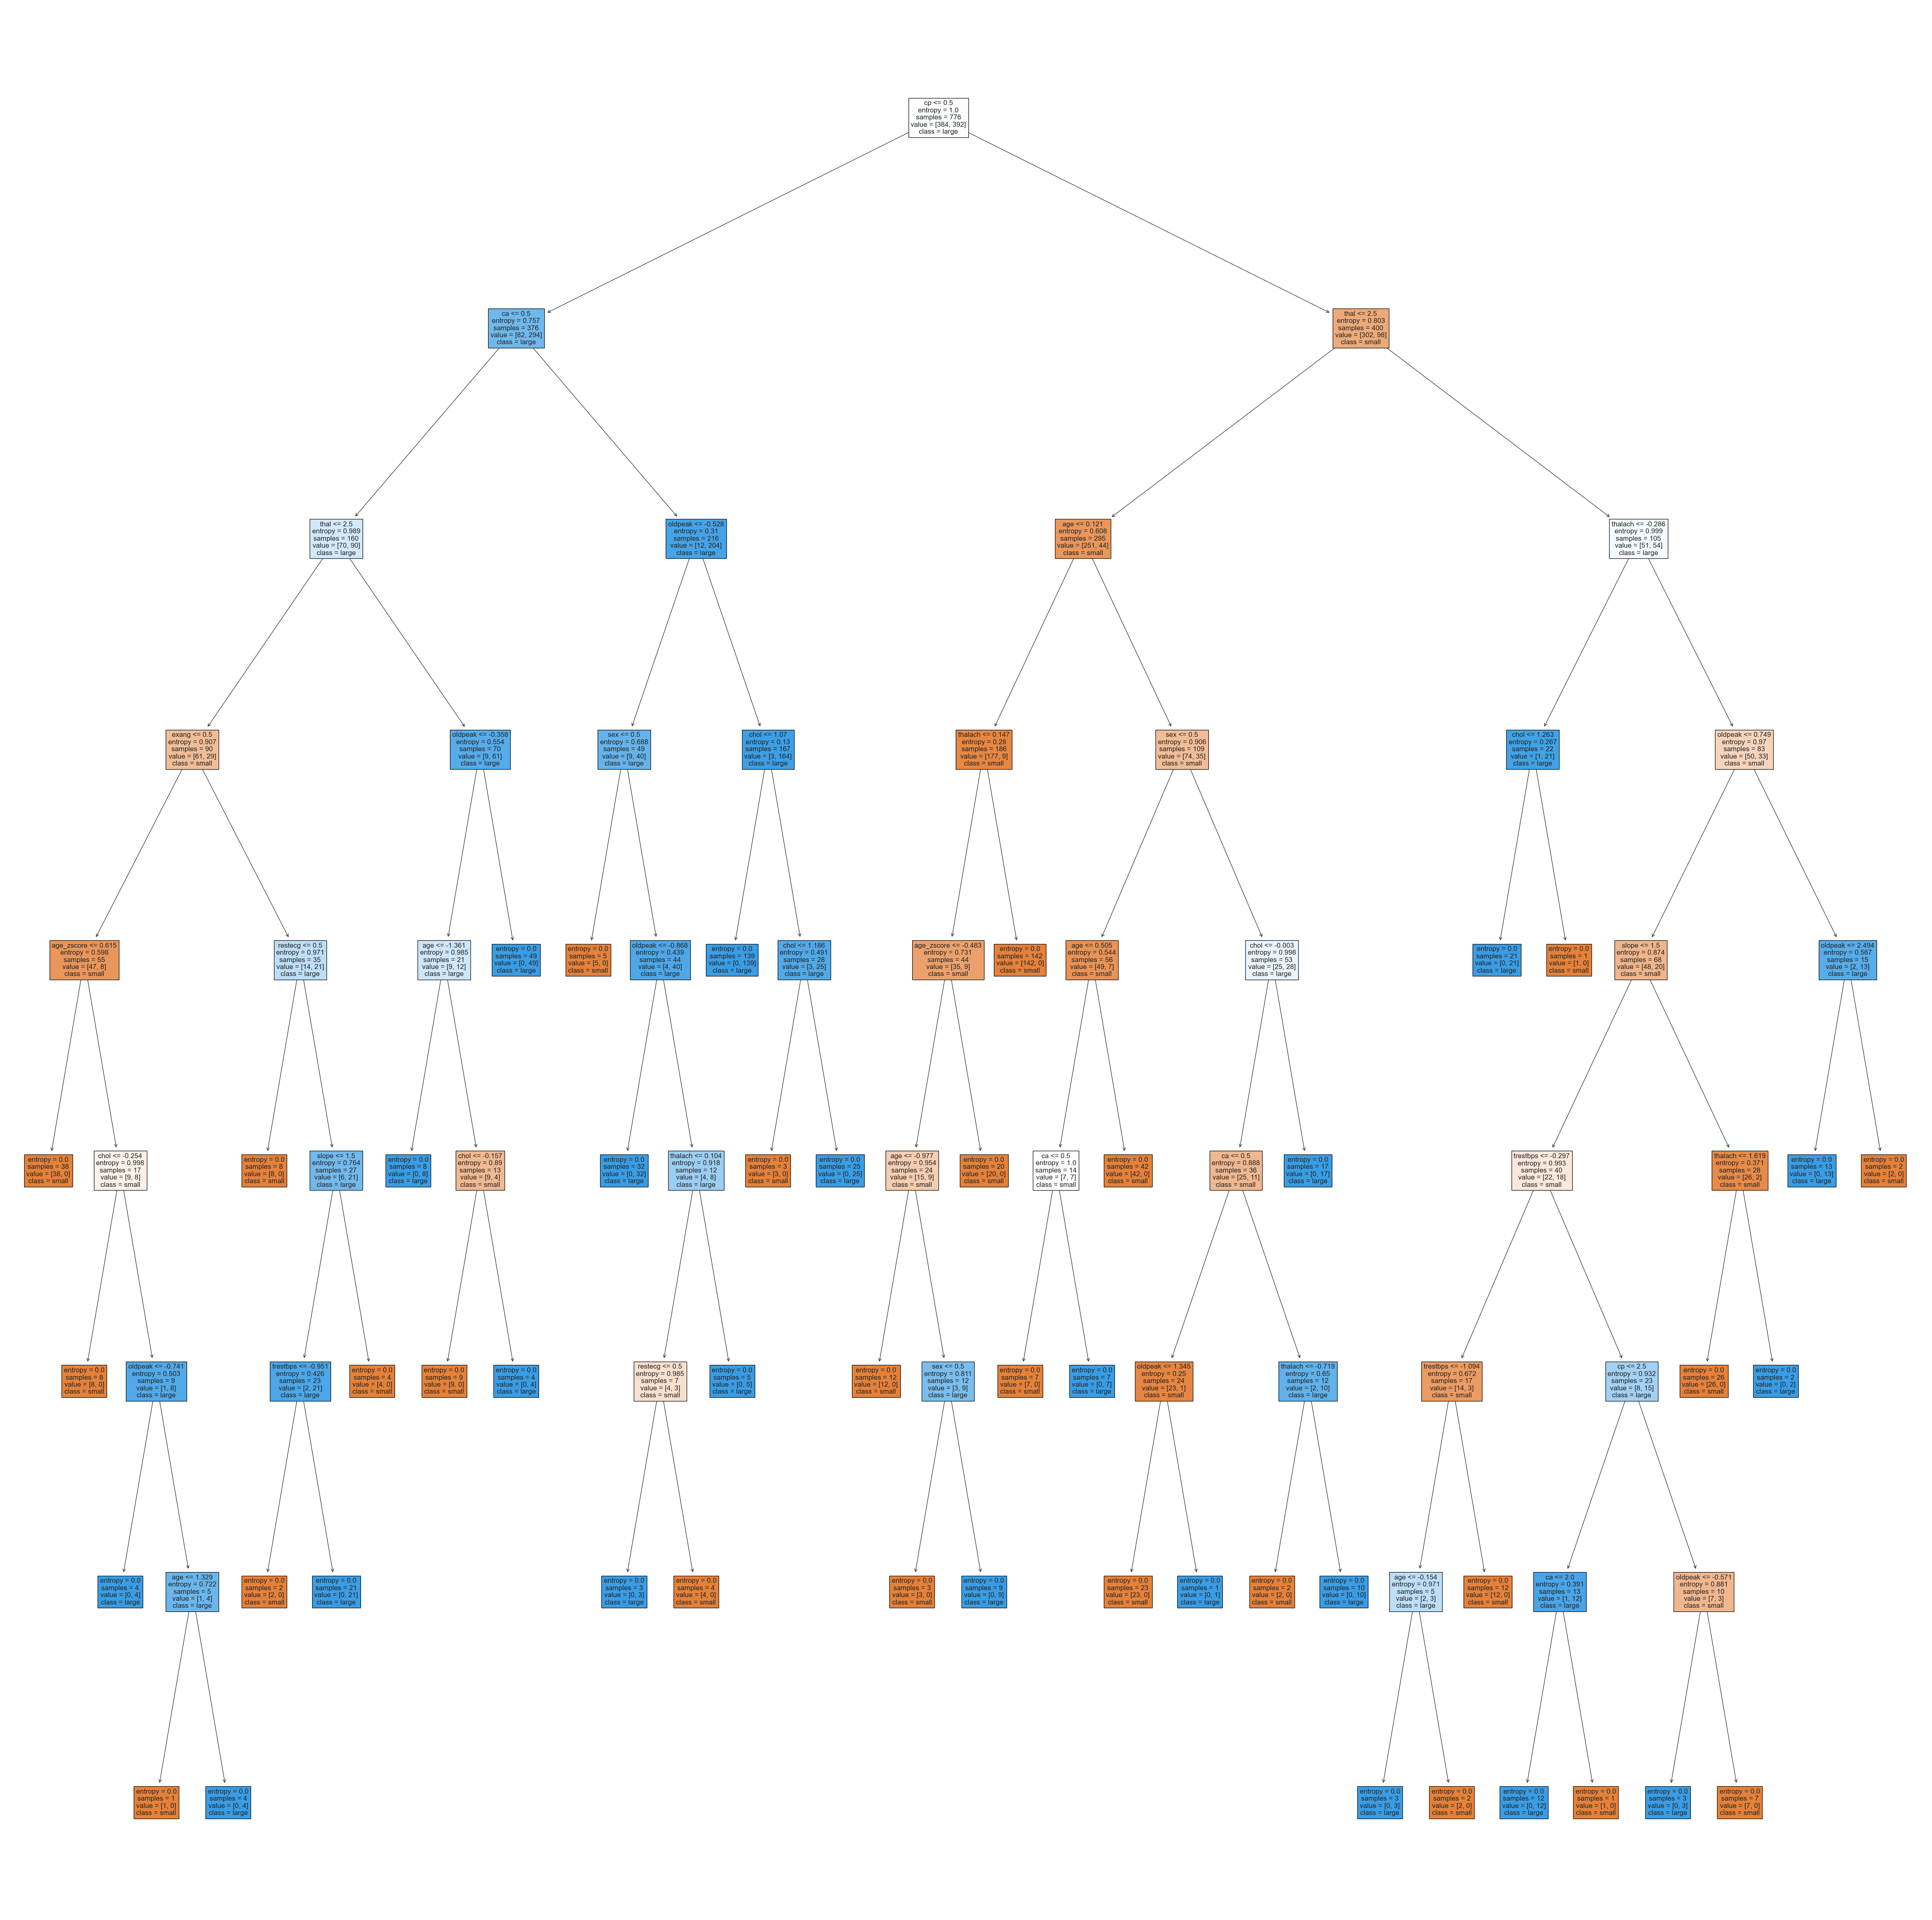

In [61]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

## using test_size = 0.1

In [62]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)


In [63]:
# Step 4: Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion="entropy")

# Step 5: Fit the classifier to the training data
clf= clf.fit(X_train, y_train)

# Step 6: Evaluate the model's performance on the test data
y_pred = clf.predict(X_test) 


# Accuracy:

In [64]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),2))


Accuracy: 1.0


### The results show that the decision tree successfully classified 100% of the patients in the dataset.

# Confusion Matrix:

In [65]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52  0]
 [ 0 45]]


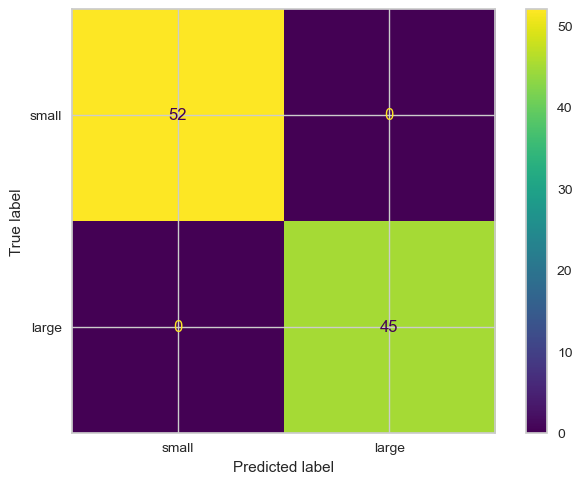

In [66]:
cn = df['target_discrete_binary'].unique() 

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### The confusion matrix show that the decision tree successfully classified the patients in the dataset.

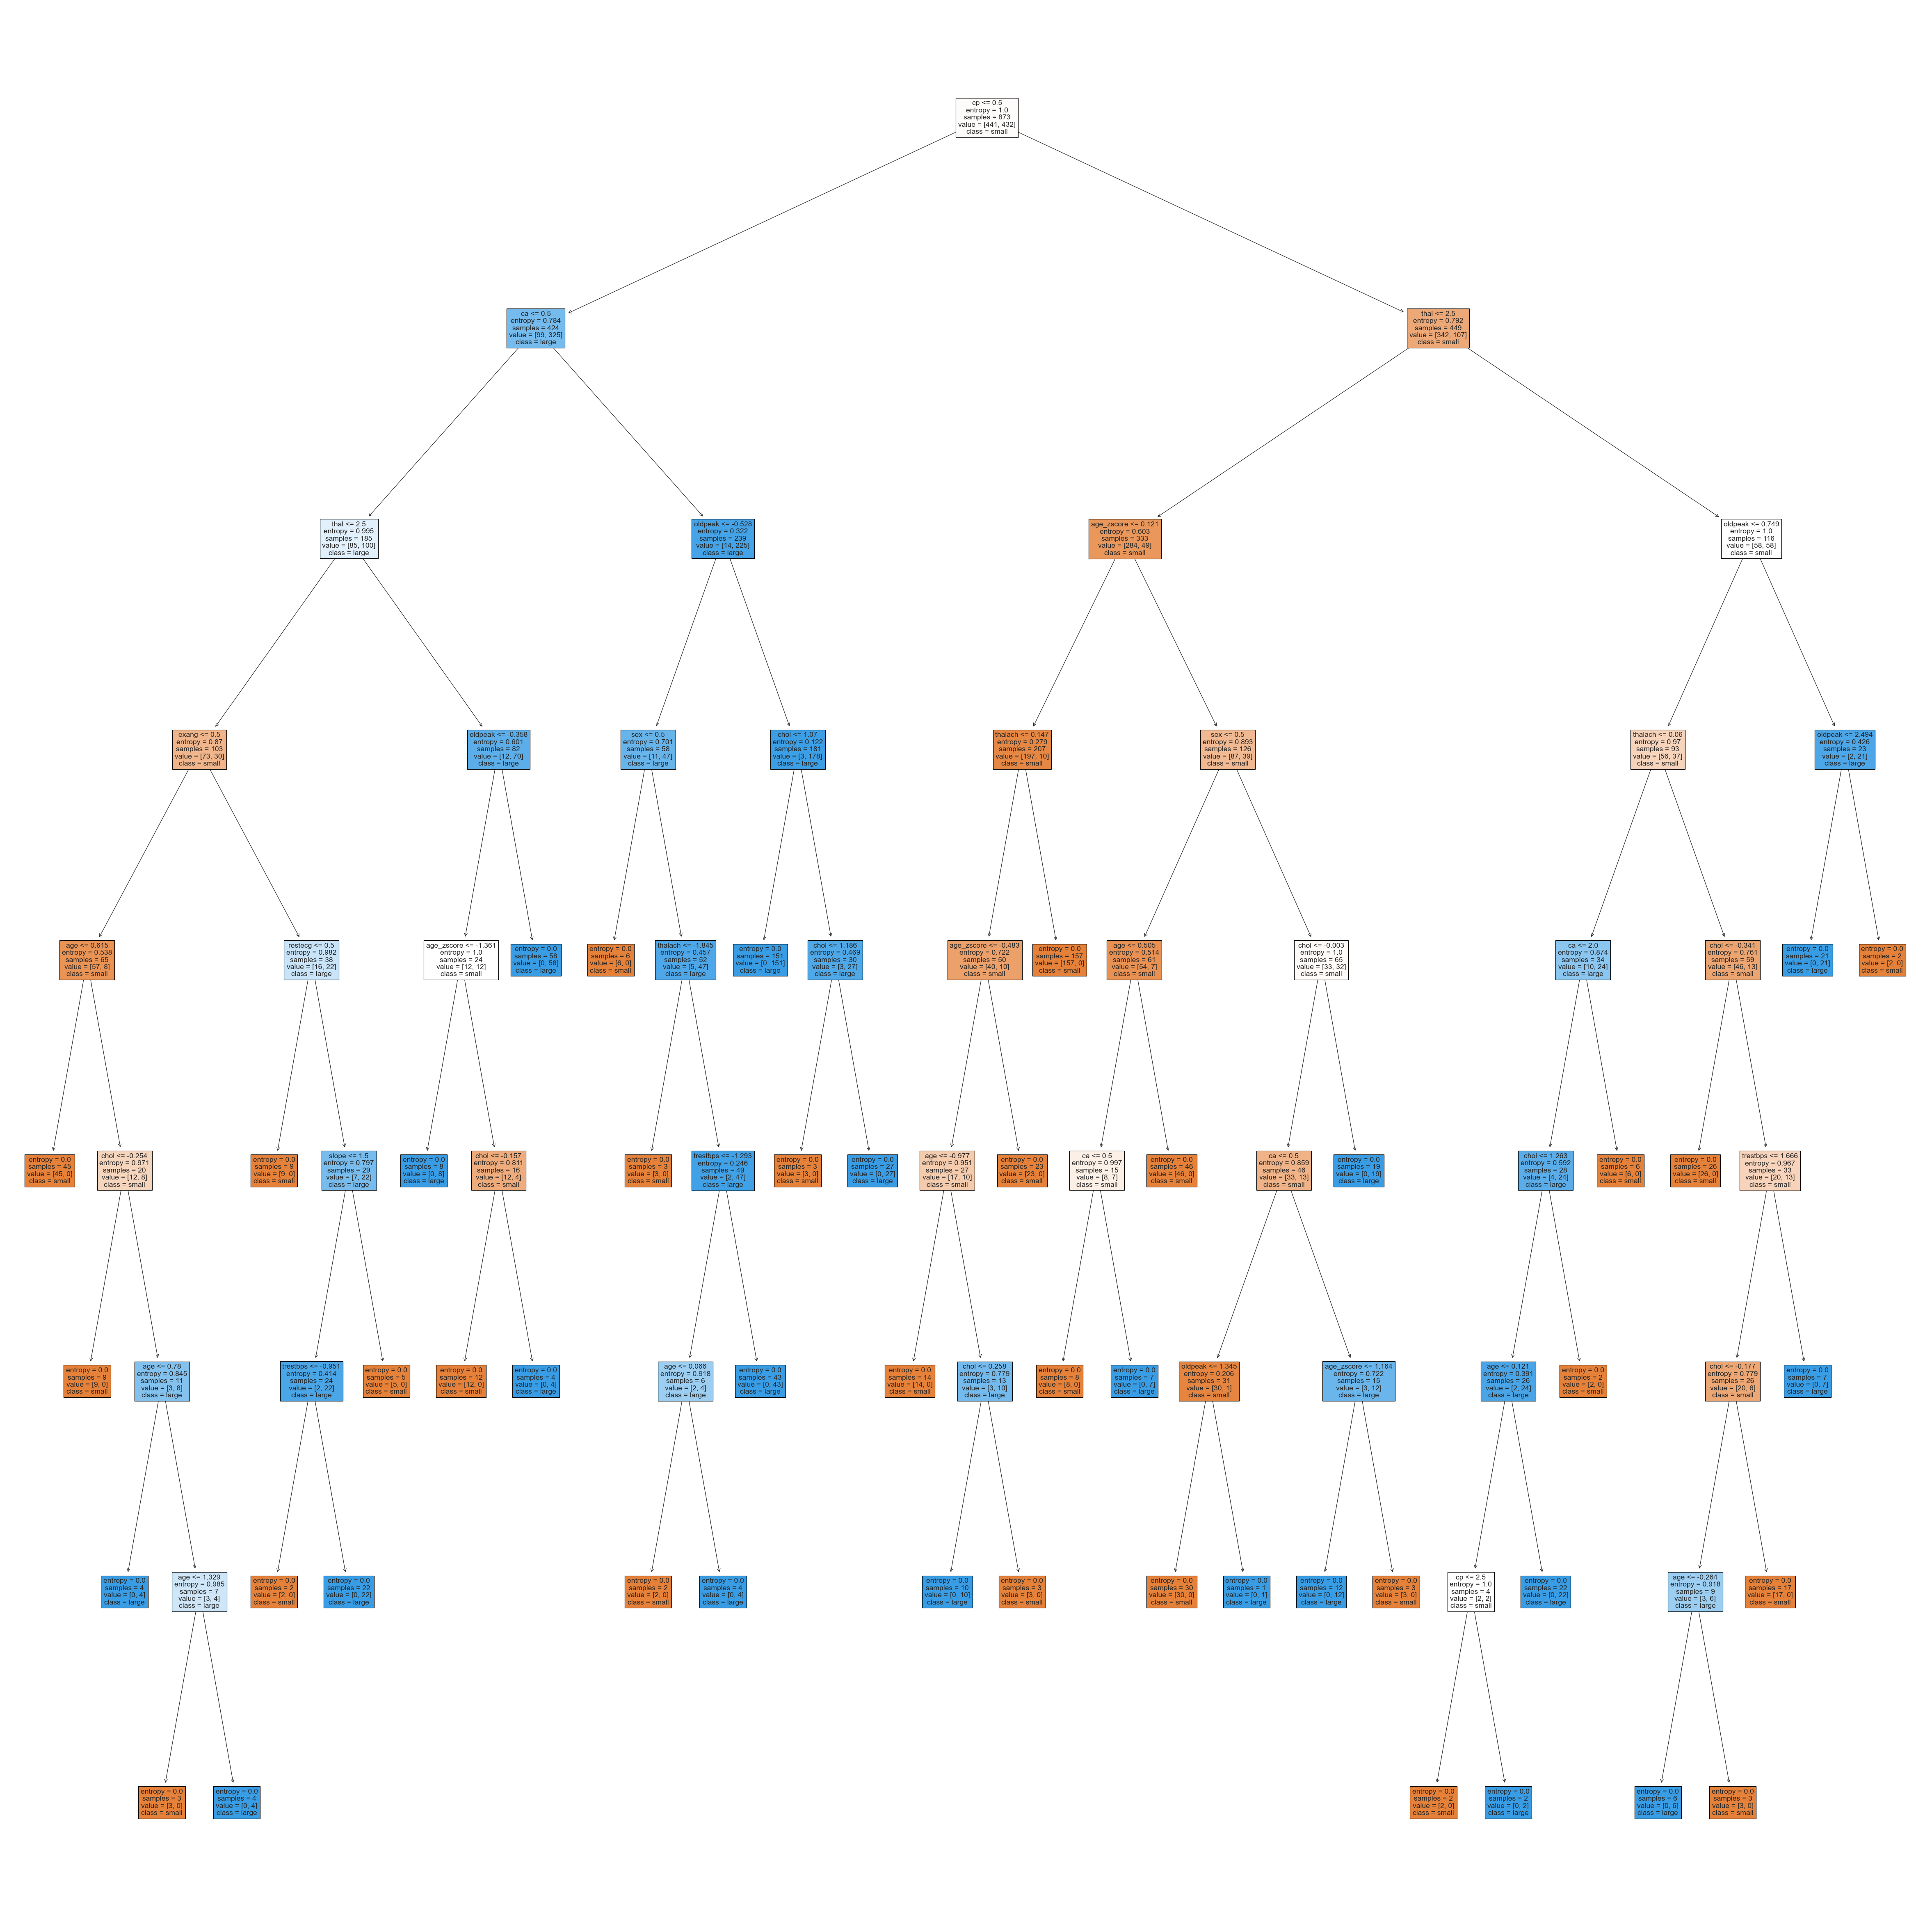

In [67]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)
plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

# You can save your plot if you want
fig.savefig('heart.png')

# Clustering

### Like clustering, unsupervised learning does not require labeled data. We will therefore remove the class label. We won't need any further encoding because the only attributes in our dataset are numerical ones. Then, in order to prevent any one characteristic from disproportionately impacting the clustering process due to variable magnitudes, we will standardize the attributes to guarantee that their scales are equivalent.

### In order to determine the three sizes to be used in K-means clustering, we will rely on validation methods to assist us in making an informed decision. Once the sizes are determined, we will proceed with the clustering process. Our primary goal is to ensure a wide range of size selections, encompassing a relatively large size, a moderate size, and a small size. By adopting this approach, we aim to cover a diverse array of potential cluster configurations.

In [68]:
# Remove class labels
# features
features = df.drop(['target', 'target_discrete','target_discrete_binary'], axis = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
print(df_scaled.head())


        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.263511  0.661088 -0.916985 -0.382498 -0.650279 -0.420933  0.880560   
1 -0.153715  0.661088 -0.916985  0.470952 -0.824211  2.375676 -1.017537   
2  1.712825  0.661088 -0.916985  0.755436 -1.384656 -0.420933  0.880560   
3  0.724657  0.661088 -0.916985  0.926126 -0.824211 -0.420933  0.880560   
4  0.834453 -1.512658 -0.916985  0.357159  0.934427  2.375676  0.880560   

    thalach     exang   oldpeak     slope        ca      thal  age_zscore  
0  0.817855 -0.711485 -0.059842  0.995126  1.201774  1.067868   -0.263511  
1  0.255064  1.405511  1.727526 -2.244043 -0.736249  1.067868   -0.153715  
2 -1.043685  1.405511  1.301962 -2.244043 -0.736249  1.067868    1.712825  
3  0.514813 -0.711485 -0.910970  0.995126  0.232763  1.067868    0.724657  
4 -1.866227 -0.711485  0.706173 -0.624458  2.170786 -0.538073    0.834453  


# k-means clustering, visualization, and evaluation:

# Two Clusters

In [71]:
np.random.seed(56)

kmeans = KMeans(n_clusters = 2, random_state=56)
kmeans_result = kmeans.fit(df_scaled)

print("Cluster center:")
print(kmeans_result.cluster_centers_)

Cluster center:
[[-0.65334547  0.00224098  0.28967921 -0.25392355 -0.2140768  -0.1614537
   0.22698892  0.59068535 -0.39720953 -0.45013254  0.45415154 -0.36862401
  -0.24337448 -0.65334547]
 [ 0.65334547 -0.00224098 -0.28967921  0.25392355  0.2140768   0.1614537
  -0.22698892 -0.59068535  0.39720953  0.45013254 -0.45415154  0.36862401
   0.24337448  0.65334547]]


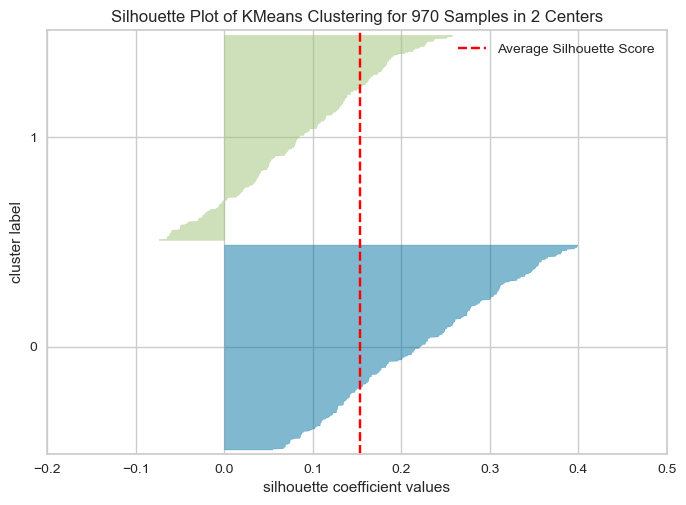

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 970 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
# visualize Silhouette score for Kmeans model with two clusters
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [73]:
# Total within-cluster sum of squares
wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 11410.876967281321


# Three Clusters

In [74]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 3, random_state =56)
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

cluster center:
[[ 0.49637724  0.16580382 -0.76673953  0.30980491  0.18977632  0.06581866
  -0.18261412 -0.81736336  0.85616361  0.73526203 -0.62445837  0.62834012
   0.48850936  0.49637724]
 [ 0.61661405 -0.3667539   0.59677045  0.21319015  0.1699817   0.22237649
  -0.24738216  0.15077641 -0.52210538 -0.27248817  0.22931623 -0.23161998
  -0.24561722  0.61661405]
 [-1.02596893  0.18299109  0.16275818 -0.48277674 -0.33188735 -0.26511008
   0.39629525  0.61904342 -0.31416046 -0.43124341  0.36819022 -0.36967279
  -0.22724565 -1.02596893]]


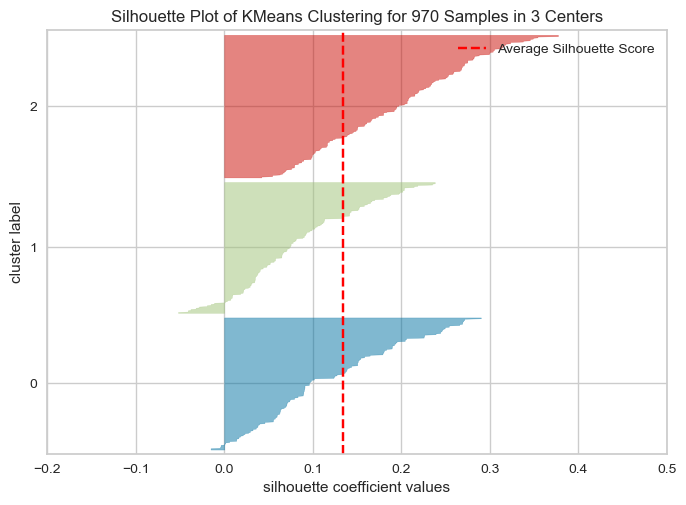

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 970 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()


In [76]:
# Total within-cluster sum of squares
wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 10350.852295583949


# Four Clusters

In [77]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 4, random_state =56 )
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

cluster center:
[[-1.03824344  0.15320314  0.21493955 -0.45906965 -0.29675786 -0.34252326
   0.37794911  0.65723076 -0.35535506 -0.48434549  0.43508292 -0.41928262
  -0.19787361 -1.03824344]
 [ 0.43241639  0.29334875 -0.70935732  0.08465353  0.09819129 -0.42093285
  -0.11843796 -0.89151373  0.80861331  0.810484   -0.66099035  0.55333786
   0.49431746  0.43241639]
 [ 0.6822555  -0.53182174  0.37885688  0.22393726  0.21136333 -0.42093285
  -0.17650982  0.15932926 -0.50494902 -0.28715559  0.244587   -0.26749951
  -0.19207753  0.6822555 ]
 [ 0.36801846  0.02641734  0.19339168  0.50916024  0.12514607  2.37567582
  -0.33865513 -0.09506145  0.16930869  0.07683528 -0.17523054  0.38837029
  -0.15124046  0.36801846]]


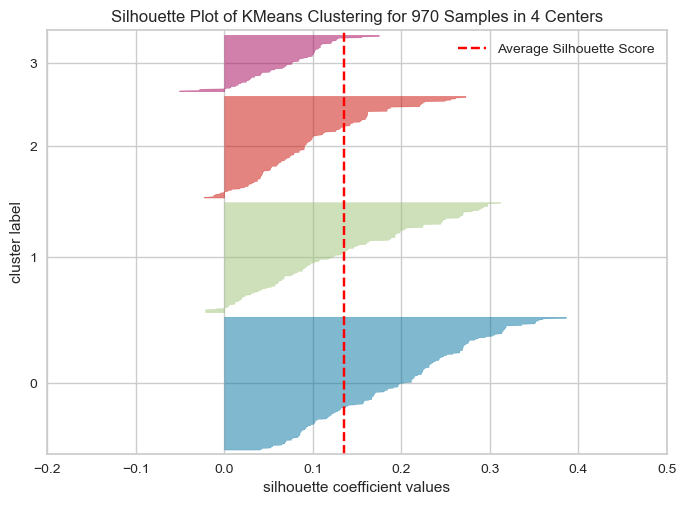

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 970 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [79]:
# Total within-cluster sum of squares
wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 9725.610095647631


## Silhouette method:

In [80]:
# Function to calculate silhouette score for a given number of clusters
def get_silhouette_score(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

# Finding the optimal number of clusters using the silhouette method
range_n_clusters = range(2, 11) 
silhouette_scores = [get_silhouette_score(df_scaled, n) for n in range_n_clusters]


In [81]:
# print silhouette scores
for i in range(2, len(silhouette_scores)):
     print(f"For {i} clusters, the average silhouette score is : {silhouette_scores[i]:.2f}")


For 2 clusters, the average silhouette score is : 0.13
For 3 clusters, the average silhouette score is : 0.12
For 4 clusters, the average silhouette score is : 0.12
For 5 clusters, the average silhouette score is : 0.13
For 6 clusters, the average silhouette score is : 0.11
For 7 clusters, the average silhouette score is : 0.12
For 8 clusters, the average silhouette score is : 0.12


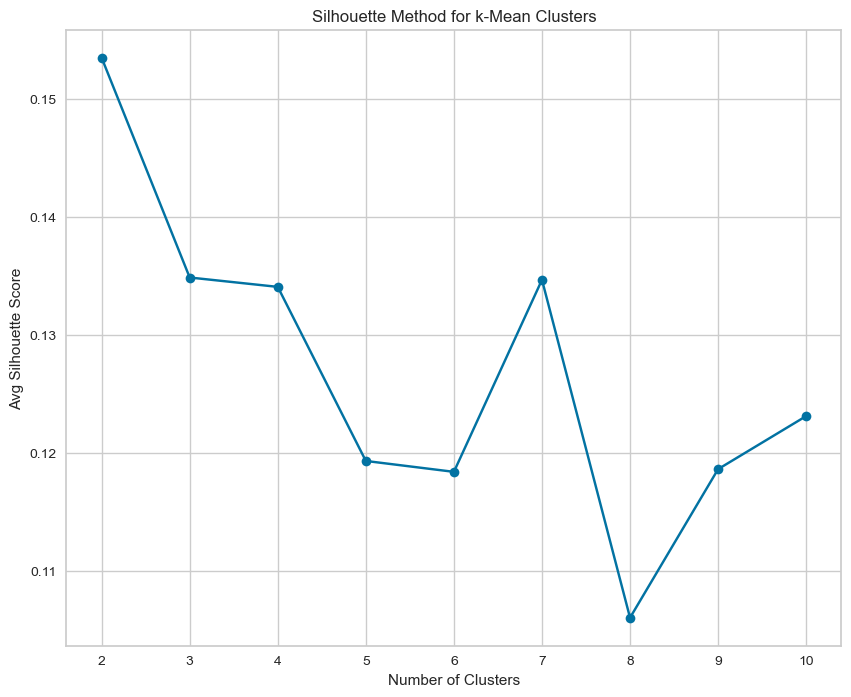

In [82]:
# Plotting silhouette scores
plt.figure(figsize=(10, 8)) 
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Avg Silhouette Score')
plt.title('Silhouette Method for k-Mean Clusters')
plt.grid(True)
plt.show()

### Determining the optimal number of clusters is made easier by the existence of a dotted line on the graph that represents the silhouette coefficient value. A greater silhouette coefficient value, represented by the letter K, suggests a better match for a specific number of clusters. For instance, the silhouette coefficient value is 0.21 when K = 2. The value then gradually drops to 0.2 when K rises to 3, and even lower to 0.15 as K reaches 4. Based on this pattern, it appears that option 2 is the best fit for K. The Elbow method is another evaluation technique used, and it determines the ideal number of clusters by looking for the turning point on the curve.

# Elbow Method:

For 1 clusters, the total within cluster sum of squares is: 13580.00
For 2 clusters, the total within cluster sum of squares is: 11410.97
For 3 clusters, the total within cluster sum of squares is: 10351.86
For 4 clusters, the total within cluster sum of squares is: 9723.02
For 5 clusters, the total within cluster sum of squares is: 9233.13
For 6 clusters, the total within cluster sum of squares is: 8932.65
For 7 clusters, the total within cluster sum of squares is: 8610.76
For 8 clusters, the total within cluster sum of squares is: 8378.88
For 9 clusters, the total within cluster sum of squares is: 8058.63


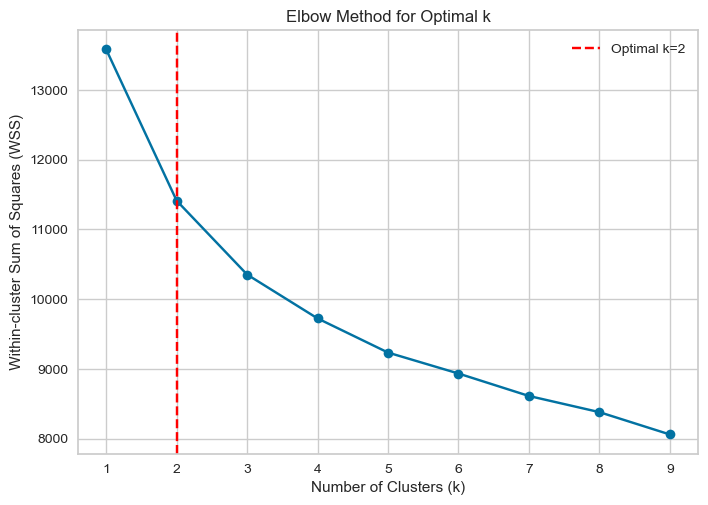

In [83]:
# Perform k-means clustering for different values of k
wss_values = []
k_values = range (1, 10)


for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wss = kmeans.inertia_
    wss_values.append(wss)
    print(f"For {k} clusters, the total within cluster sum of squares is: {wss:.2f}")


# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel ( 'Number of Clusters (k)') 
plt.ylabel(' Within-cluster Sum of Squares (WSS) ') 
plt.title('Elbow Method for Optimal k')

# Plot a red line at k=2
plt.axvline(x=2, color='red', linestyle='--', label='Optimal k=2')

plt.legend ()
plt.show( )

### Upon examining the graph that shows the total within-cluster sum of squares (WSS) against K, one can observe that the point of inflection is associated with a cluster count of 2. It follows from this that two clusters is the ideal number.